### Objetivo Geral

 Analisar códigos do configurador de produtos (todo histórico do configurador)

### Objetivos Especifícos

 Quantificar códigos unicos do configurador
 
 Quantiticar quantidade de vezes que um código do configurador foi utilizado

 Quantificar códigos unicos do protheus (genérico)
 
 Quantificar quantidade de vezes que um código do protheus (genérico) foi utilizado
 
 Listar produtos mais vendidos por código do protheus (genérico)

In [1]:
# Importar Lib matpltlib
import matplotlib.pyplot as plt
# Importar lib para conectar ao banco de dados
import pyodbc
# Importar lib pandas
import pandas as pd
pd.set_option('display.max_colwidth', -1)

# Parâmetros para conectar ao banco de dados
server = '192.168.5.249' 
database = 'dadosadv' 
username = 'manager' 
password = 'adm*2014' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [2]:
cursor = cnxn.cursor()

sql = """
   SELECT COUNT(1) QTD,
          B1_ZCODCFG,
          B1_DESC
     FROM SC5010 C5 (NOLOCK)
     JOIN SC6010 C6 (NOLOCK)
       ON C6.C6_NUM = C5.C5_NUM
      AND C6.C6_FILIAL = C5.C5_FILIAL
      AND C6.D_E_L_E_T_ = ''
     JOIN SB1010 B1 (NOLOCK)
       ON B1.B1_COD = C6_PRODUTO
      AND B1.D_E_L_E_T_ = ''
    WHERE C5.D_E_L_E_T_ = ''
      AND C5.C5_EMISSAO >= '20190101'
      AND B1_ZCODCFG <> ''
 GROUP BY B1_ZCODCFG, B1_DESC
 ORDER BY QTD DESC
"""

data = pd.read_sql(sql,cnxn)

In [3]:
# Quantidade unica de códigos CONFIGURADOR gerados
data['B1_ZCODCFG'].nunique()

6206

In [4]:
data[['B1_ZCODCFG','B1_DESC']]

,B1_ZCODCFG,B1_DESC
0,1765B13311000001310112220K9110017A200001112000001010000000000000000000000000000000000,REBOQUE DOLLY REBOQUE 2 EIXOS JUNTOS MECANICOS 5600 MM
1,1765B13311000001210112220D9110017A200001112000000010000000000000000000000000000000000,REBOQUE DOLLY REBOQUE 2 EIXOS JUNTOS MECANICOS 5600 MM
2,1765B13311000001310112220O9110017A200001112000001010000000000000000000000000000000000,REBOQUE DOLLY REBOQUE 2 EIXOS JUNTOS MECANICOS 5600 MM
3,14117829221100020101681101111002112211211121111200100000z1000K0122111121100153z000000,SEMIRREBOQUE CARGA SECA 3 EIXOS DISTANCIADOS PNEUM AUTODIRECIONAL COM RALA 13500
4,1765B13311000001210112220K9110017A200001112000000010000000000000000000000000000000000,REBOQUE DOLLY REBOQUE 2 EIXOS JUNTOS MECANICOS 5600 MM
5,1765B13311000001210112220O9110017A200001112000000010000000000000000000000000000000000,REBOQUE DOLLY REBOQUE 2 EIXOS JUNTOS MECANICOS 5600 MM
6,1765B13311000001310112220D9110017A200001112000001010000000000000000000000000000000000,REBOQUE DOLLY REBOQUE 2 EIXOS JUNTOS MECANICOS 5600 MM
7,1311752211100001110118220KD110017A233A14112111320010000052221111211z00000000000000000,SEMIRREBOQUE BASE FRIGORIFICA 3 EIXOS JUNTOS MECANICOS 14650
8,16427534221A400101011811011110017A213A31114111121010000021002701211115111001321000000,BITRENZAO CARGA SECA DIANTEIRO 3 EIXOS JUNTOS MECANICOS 9400MM
9,164475372215100101011411011110017A213A31114222221010000021103701211115111001421000000,BITRENZAO CARGA SECA TRASEIRO 3 EIXOS JUNTOS MECANICOS 11500MM


In [5]:
# Quantidade de vezes (até) que 80% dos códigos dos configurador foram utilizados (Dados em ROL).
data['QTD'].quantile([0.80])

0.8    4.0
Name: QTD, dtype: float64

In [6]:
# Quantidade de vezes que um código CONFIGURADOR foi utilizado
data_qtd = data['QTD'].value_counts().sort_index()

In [7]:
# Quantidade de pedidos que foram criados com cada código.
## Procedimentos abaixo (linhas 3,4,5), convertem a contagem (em inteiro) para datafram
df_val_counts = data_qtd
df_value_counts = data_qtd.reset_index()
# Trocar Nomes das Colunas
df_value_counts.columns = ['QTD', 'CONT'] 
## Criar coluna com qtd x cont
df_value_counts['QTD_PROD_GERADOS'] = df_value_counts['QTD'] * df_value_counts['CONT']

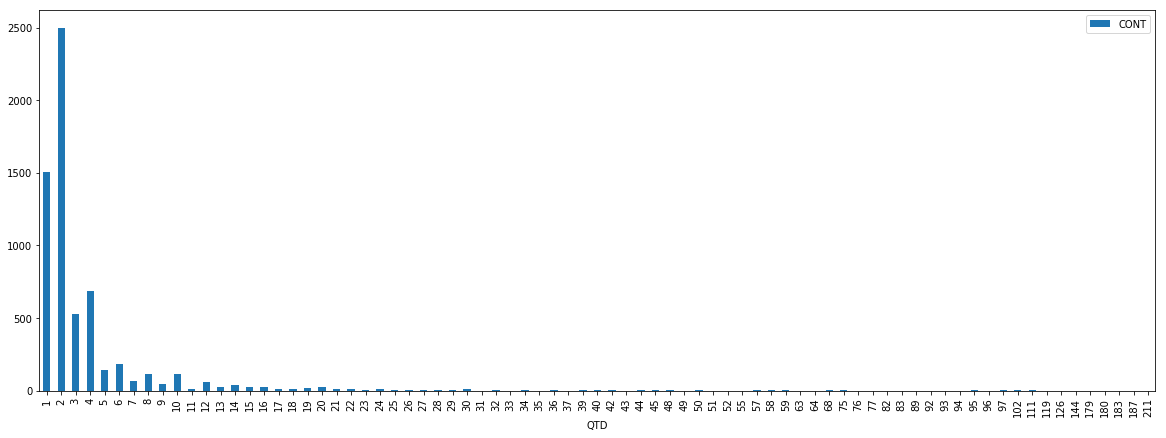

In [8]:
# Quantidade de códigos do CONFIGURADOR (y) x Quantas vezes foi utilizado (x)
df_value_counts.plot.bar(x='QTD',y='CONT',figsize=(20,7))

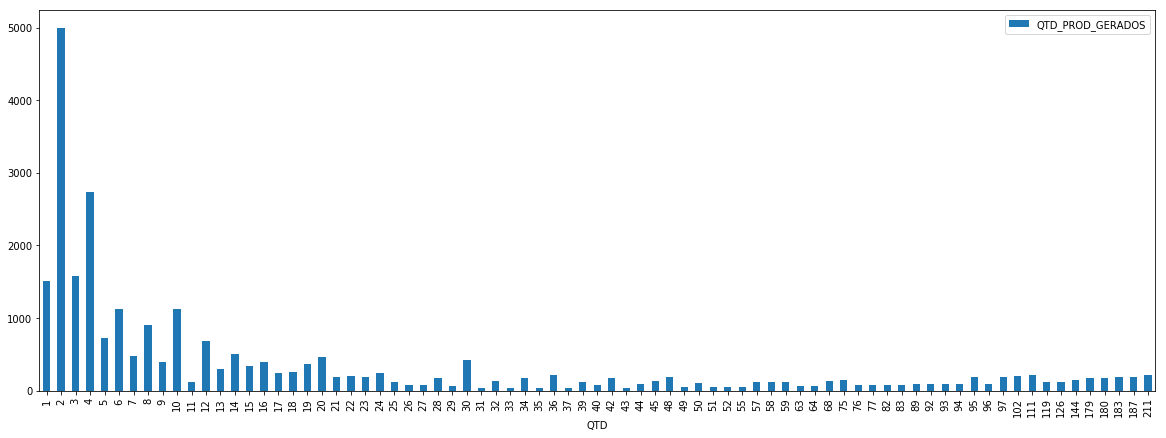

In [9]:
# Quantidade de pedidos gerados, através dos códigos códigos relacionados acima
df_value_counts.plot.bar(x='QTD',y='QTD_PROD_GERADOS',figsize=(20,7))

In [10]:
# Eliminar coluna do cod do configurador, para possibilitar agrupamento por descrição
data_simple = data.drop(['B1_ZCODCFG'], axis=1)
# Agrupar data por descrição genérica, somar totais, e organizar em ROL
data_simple_group = data_simple.groupby('B1_DESC').sum().sort_values('QTD', ascending=0).reset_index()

In [11]:
# Quantidade de produtos (códigos agrupados) utilizados do configurador de produtos
data_simple_group['B1_DESC'].nunique()

465

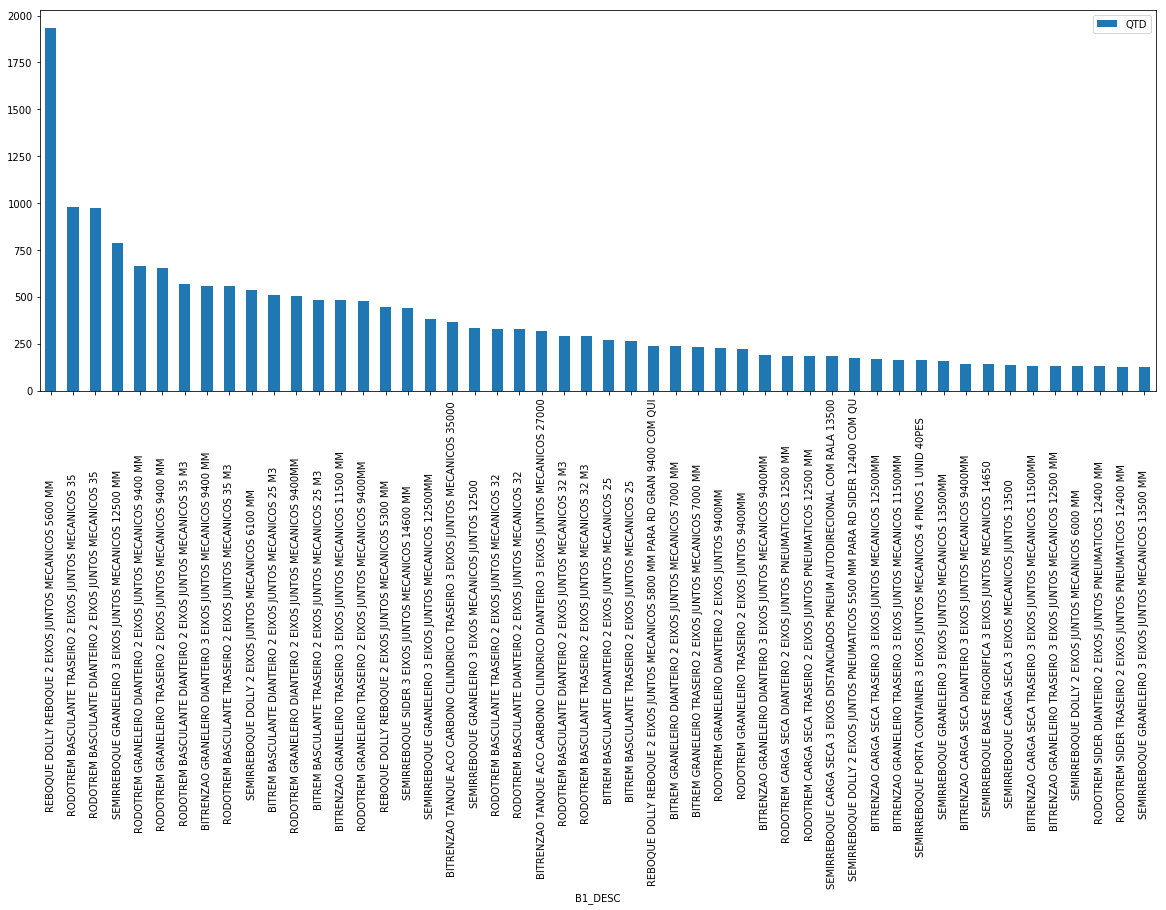

In [12]:
# Quantidade de produtos mais utilizados dos códigos do configurador
chart2 = data_simple_group.head(50).plot.bar(x='B1_DESC', y='QTD', rot=0,figsize=(20,7))
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
chart2

In [13]:
data_simple_group

,B1_DESC,QTD
0,REBOQUE DOLLY REBOQUE 2 EIXOS JUNTOS MECANICOS 5600 MM,1933
1,RODOTREM BASCULANTE TRASEIRO 2 EIXOS JUNTOS MECANICOS 35,977
2,RODOTREM BASCULANTE DIANTEIRO 2 EIXOS JUNTOS MECANICOS 35,974
3,SEMIRREBOQUE GRANELEIRO 3 EIXOS JUNTOS MECANICOS 12500 MM,786
4,RODOTREM GRANELEIRO DIANTEIRO 2 EIXOS JUNTOS MECANICOS 9400 MM,662
5,RODOTREM GRANELEIRO TRASEIRO 2 EIXOS JUNTOS MECANICOS 9400 MM,653
6,RODOTREM BASCULANTE DIANTEIRO 2 EIXOS JUNTOS MECANICOS 35 M3,570
7,BITRENZAO GRANELEIRO DIANTEIRO 3 EIXOS JUNTOS MECANICOS 9400 MM,560
8,RODOTREM BASCULANTE TRASEIRO 2 EIXOS JUNTOS MECANICOS 35 M3,556
9,SEMIRREBOQUE DOLLY 2 EIXOS JUNTOS MECANICOS 6100 MM,537


#### Resultados esperados da análise
  * Questionamento sobre modelo de negócio adotado pela organização (nível de configuração de um produto)
  * Definição do nível de integração entre portal representante vs protheus
